In [1]:
treatment_data = matrix(c(20, 3, 10, 6, 13, 3, 35, 10, 22, 9, 7, 3), ncol=2, byrow=TRUE)

control_data = matrix(c(9, 6, 11, 7, 4, 6, 21, 18, 12, 17, 0, 10), ncol=2, byrow=TRUE)

In [3]:
treatment_data[,1] / rowSums(treatment_data)
var(treatment_data[,1] / rowSums(treatment_data))

control_data[,1] / rowSums(control_data)
var(control_data[,1] / rowSums(control_data))

var(control_data[,1] / rowSums(control_data)) / var(treatment_data[,1] / rowSums(treatment_data))

[1] 0.8695652 0.6250000 0.8125000 0.7777778 0.7096774 0.7000000

[1] 0.00774392

[1] 0.6000000 0.6111111 0.4000000 0.5384615 0.4137931 0.0000000

[1] 0.05189634

[1] 6.701559

In [4]:
log(rowSums(treatment_data) + 1)

[1] 3.178054 2.833213 2.833213 3.828641 3.465736 2.397895

We consider the eczema medical trial data set again. This time we will compare which of 2 models explain the observed data best.

* Model 1: All studies have the same probability of success.
* Model 2: A hierarchical model where the probability of success in each study is drawn from a beta prior distribution with unknown $\alpha$ and $\beta$ parameters.


|Study          | Treatment group |   Control group  |
|---------------|-----------------|------------------|
|Di Rienzo 2014 |     20 / 23     |        9 / 15    |
|Galli 1994     |     10 / 16     |       11 / 18    |
|Kaufman 1974   |     13 / 16     |        4 / 10    |
|Qin 2014       |     35 / 45     |       21 / 39    |
|Sanchez 2012   |     22 / 31     |       12 / 29    |
|Silny 2006     |      7 / 10     |        0 / 10    |
|**Totals**     |    107 / 141    |       57 / 121   |


**Model 1:**

* For each group (treatment and control), all 6 studies have the same fixed, but unknown, probability of success, $\theta_t,\theta_c\in[0,1]$.
* The data follow a binomial distribution in each study, conditioned on the probability of success — $\theta_t$ for treatment or $\theta_c$ for control.
* The priors over $\theta_t$ and $\theta_c$ are uniform.

These assumptions lead to the following model.

* Likelihood: $\prod_{i=1}^6 \text{Binomial}(s_i\,|\,\theta, n_i)$, where $s_i$ is the number of successful recoveries, $f_i$ is the number of failures (did not recover), and $n_i=s_i+f_i$ the number of patients.

* Prior: $\text{Beta}(\theta\,|\,1,1)$ for both $\theta_t$ and $\theta_c$.

* Posterior for treatment group: $\text{Beta}(\theta_t\,|\,108, 35)$.

* Posterior for control group: $\text{Beta}(\theta_c\,|\,58, 65)$.

Since we have closed-form solutions for the posteriors, we can calculate the marginal likelihood by rearranging Bayes' equation: (marginal likelihood) = (likelihood) x (prior) / (posterior).

$$ P(\text{data}) = \left[\prod_{i=1}^6 \text{Binomial}(s_i\,|\,\theta, n_i) \right] \frac{\text{Beta}(\theta\,|\,\alpha_0,\beta_0)}{\text{Beta}(\theta\,|\,\alpha_1,\beta_1)}$$
where $\alpha_0=1$ and $\beta_0=1$ are the parameters of the prior, and $\alpha_1$ and $\beta_1$ are the parameters of the posterior beta distribution.

Since all factors involving $\theta$ cancel out, we are just left with the normalization constants of the likelihood, the prior and the posterior:

$$\begin{align}
P(\text{data})
&= \left[ \prod_{i=1}^6 \left(\begin{array}{c}s_i+f_i \\ s_i\end{array}\right) \right] \frac{\text{B}(\alpha_1,\beta_1)}{\text{B}(\alpha_0,\beta_0)} \\
&= \left[\prod_{i=1}^6 \frac{1}{(s_i+f_i+1)\text{B}(s_i+1,f_i+1)}\right] \frac{\text{B}(\alpha_1,\beta_1)}{\text{B}(\alpha_0,\beta_0)}
\end{align}$$

We usually compute the log of the marginal likelihood since the results can vary over many orders of magnitude.

**Task 1:**

* Take the log of the marginal likelihood above.
* Complete the R function below to calculate the log marginal likelihood.
* You can use the built-in function `lbeta(a,b)` to compute $\log \text{B}(a,b)$.

Taking the log of the marginal likelihood form above:

$$\begin{align}
P(\text{data}) &= \left[\prod_{i=1}^6 \frac{1}{(s_i+f_i+1)\text{B}(s_i+1,f_i+1)}\right] \frac{\text{B}(\alpha_1,\beta_1)}{\text{B}(\alpha_0,\beta_0)} \\
\log P(\text{data}) &= \log \Big( \left[\prod_{i=1}^6 \frac{1}{(s_i+f_i+1)\text{B}(s_i+1,f_i+1)}\right] \frac{\text{B}(\alpha_1,\beta_1)}{\text{B}(\alpha_0,\beta_0)} \Big) \\
&= \left[\sum_{i=1}^6 \log \big( \frac{1}{(s_i+f_i+1)\text{B}(s_i+1,f_i+1)} \big) \right] + \log \big( \frac{\text{B}(\alpha_1,\beta_1)}{\text{B}(\alpha_0,\beta_0)} \big) \\
&= -\sum_{i=1}^6 \big( \log (s_i+f_i+1) + \log \text{B}(s_i+1,f_i+1) \big) + \log(\text{B}(\alpha_1,\beta_1)) - \log (\text{B}(\alpha_0,\beta_0)) \\
\log P(\text{data}) &= \log \text{B}(\alpha_1,\beta_1)  - \log \text{B}(\alpha_0,\beta_0) -\sum_{i=1}^6 \log (s_i+f_i+1) -\sum_{i=1}^6 \log \text{B}(s_i+1,f_i+1) 
\end{align}$$

In [15]:
nrow(treatment_data)

[1] 6

In [5]:
log_beta_binomial_marginal_likelihood <- function(alpha0, beta0, data) {
    # Compute the log marginal likelihood of the beta-binomial model for the eczema data set.
    # alpha0, beta0: prior beta distribution parameters.
    # data: 2 x n matrix with number of successes in the first row and number of failures in the second row.
    log_beta_sum <- 0
#     for (i in 1:nrow(data)) {
#         log_beta_sum <- log_beta_sum + lbeta(1 + data[i,1], 1 + data[i,2])
#     }
    
    return (lbeta(alpha0 + sum(data[,1]), beta0 + sum(data[,2])) - lbeta(alpha0, beta0) -
             sum(log(rowSums(data) + 1)) - sum(lbeta(1 + data[,1], 1 + data[,2])))
}

log_beta_binomial_marginal_likelihood(1, 1, treatment_data)
log_beta_binomial_marginal_likelihood(1, 1, control_data)
exp(log_beta_binomial_marginal_likelihood(1, 1, treatment_data)) / exp(log_beta_binomial_marginal_likelihood(1, 1, control_data))

[1] -14.00975

[1] -18.99395

[1] 146.0861

In [6]:
lbeta(1 + treatment_data[,1], 1 + treatment_data[,2])

[1] -10.657353 -11.821410  -9.161150 -25.711987 -20.284951  -7.185387

**Model 2:**

* For each group (intervention and control), each of the 6 studies has a different probability of success.
* Each probability of success is drawn from a beta prior with unknown parameters $\alpha$ and $\beta$.
* Since $\alpha$ and $\beta$ are unknown, we put a broad hyperprior on them — we choose the Gamma(2, 0.5) distribution, which is shown below.

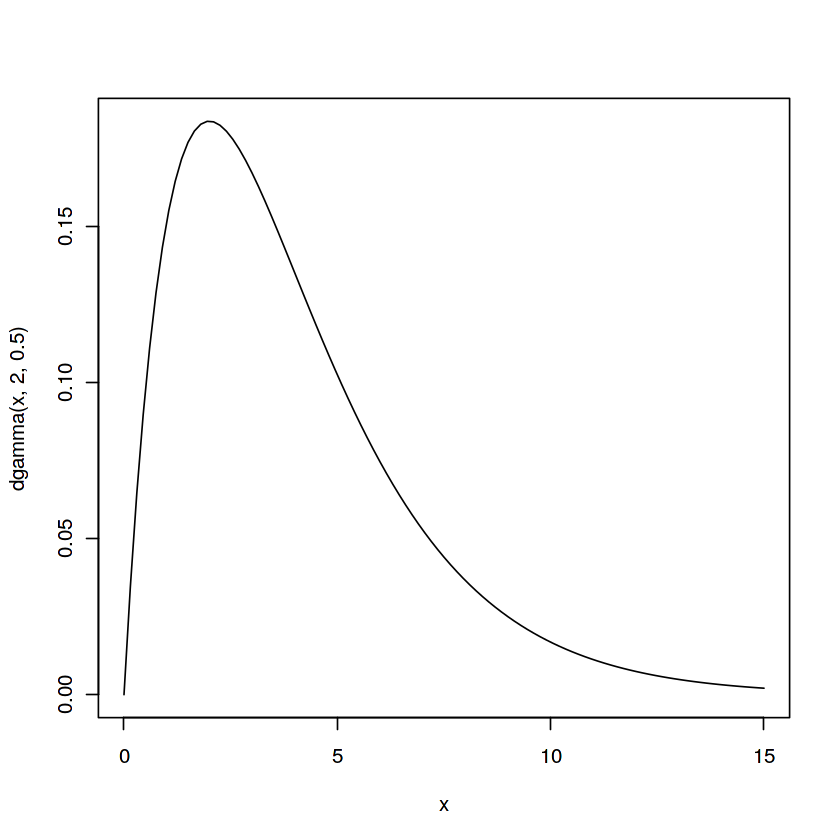

In [1]:
curve(dgamma(x, 2, 0.5), from=0, to=15)

These assumptions lead to the following model:

* Likelihood: $\prod_{i=1}^6 \text{Binomial}(s_i\,|\,\theta_i, n_i)$, where $s_i$ is the number of successful recoveries, $f_i$ is the number of failures (did not recover), and $n_i=s_i+f_i$ the number of patients. Note that each study has its own $\theta_i$, whereas Model 1 had the same $\theta$ for all 6 studies.

* Prior: $\prod_{i=1}^6 \text{Beta}(\theta_i\,|\,\alpha,\beta)$.

* Hyperprior: $P(\alpha,\beta) = \text{Gamma}(\alpha\,|\,2,0.5)\,\text{Gamma}(\beta\,|\,2,0.5)$.

This model has 8 parameters (for each of the treatment and control groups), namely $\theta_1, \ldots, \theta_6$, $\alpha$, and $\beta$.

Since the posterior does not have a closed-form analytical solution, we have to calculate the marginal likelihood by integrating out all of the parameters in the model.

$$ P(\text{data}) = \int_0^{\infty} \int_0^{\infty} \int_0^1\cdots\int_0^1 \left[\prod_{i=1}^6 \text{Binomial}(s_i\,|\,\theta_i,n_i)\,\text{Beta}(\theta_i\,|\,\alpha,\beta) \right] P(\alpha,\beta)\ \text{d}\theta_6\cdots\text{d}\theta_1\,\text{d}\beta\,\text{d}\alpha$$

This looks like a crazy 8-dimensional integral, but we can actually integrate out the $\theta_i$ analytically, leaving a 2-dimensional integral over $\alpha$ and $\beta$.

First, note that $P(\alpha,\beta)$ does not contain $\theta_i$, so we can move it outside of the $\theta_i$ integrals.

$$ = \int_0^{\infty} \int_0^{\infty} P(\alpha,\beta) \textcolor[rgb]{0.00,0.00,1.00}{\int_0^1\cdots\int_0^1 \left[\prod_{i=1}^6 \text{Binomial}(s_i\,|\,\theta_i,n_i)\,\text{Beta}(\theta_i\,|\,\alpha,\beta) \right] \ \text{d}\theta_6\cdots\text{d}\theta_1}\,\text{d}\beta\,\text{d}\alpha$$

Next, since there are no factors containing two different $\theta_i$ variables [(go to explanation)](http://example.com), we can rearrange the integrals and the products (the blue part) like this:

$$ = \int_0^{\infty} \int_0^{\infty} P(\alpha,\beta) \textcolor[rgb]{0.00,0.00,1.00}{\left[\prod_{i=1}^6 \int_0^1\text{Binomial}(s_i\,|\,\theta_i,n_i)\,\text{Beta}(\theta_i\,|\,\alpha,\beta)\,\text{d}\theta_i\right]}\,\text{d}\beta\,\text{d}\alpha$$

**Note that we cannot always swap products and integrals.**


Since the beta distribution is conjugate to the binomial, the blue integrals above can be evaluated analytically (much like we did for Model 1), to get

$$ = \int_0^{\infty}\int_0^{\infty} P(\alpha,\beta) \left[\prod_{i=1}^6 \frac{1}{(s_i+f_i+1)\,\text{B}(s_i+1,f_i+1)}\,\frac{\text{B}(\alpha+s_i, \beta+f_i)}{\text{B}(\alpha,\beta)}\right]\,\text{d}\beta\,\text{d}\alpha$$

Finally, move all the factors that do not depend on $\alpha$ or $\beta$ out of the integrals.

$$ = \left[\prod_{i=1}^6 (s_i+f_i+1)\,\text{B}(s_i+1,f_i+1) \right]^{-1} \int_0^{\infty}\int_0^{\infty} P(\alpha,\beta)\, \text{B}(\alpha,\beta)^{-6} \prod_{i=1}^6 \text{B}(\alpha+s_i, \beta+f_i)\ \text{d}\beta\,\text{d}\alpha$$

Unfortunately we cannot evaluate the remaining integrals analytically, so we resort to a numerical calculation.

**Task 2:**

* Read up about the `adaptIntegrate(f, lowerLimit, upperLimit)` function in the `cubature` package — see the function documentation below.
* How would you define a function $f$ so that `adaptIntegrate(f, c(0, 0), c(Inf, Inf))` evaluates the 2-dimensional integral over $\alpha$ and $\beta$ above?

Looking at how to best evaluate the independent factor:
$$ 
\left[\prod_{i=1}^6 (s_i+f_i+1)\,\text{B}(s_i+1,f_i+1) \right]^{-1} = \exp \Big( \log \prod_{i=1}^6 \frac{1}{(s_i+f_i+1)\,\text{B}(s_i+1,f_i+1)} \Big) = \exp \Big( - \sum_{i=1}^6 \log (s_i+f_i+1) - \sum_{i=1}^6 \log \text{B}(s_i+1,f_i+1) \Big)
$$

As for the integrand itself:
\begin{align*}
& \int_0^{\infty}\int_0^{\infty} P(\alpha,\beta)\, \prod_{i=1}^6 \frac{\text{B}(\alpha+s_i, \beta+f_i)}{\text{B}(\alpha,\beta)}\ \text{d}\beta\,\text{d}\alpha \\
&= \int_0^{\infty}\int_0^{\infty} P(\alpha,\beta)\, \exp \Big( \log \big( \prod_{i=1}^6 \frac{\text{B}(\alpha+s_i, \beta+f_i)}{\text{B}(\alpha,\beta)} \big) \Big) \text{d}\beta\,\text{d}\alpha \\
&= \int_0^{\infty}\int_0^{\infty} P(\alpha,\beta)\, \exp \Big( \sum_{i=1}^6 \log \text{B}(\alpha+s_i, \beta+f_i) -6 \log \text{B}(\alpha,\beta) \Big) \text{d}\beta\,\text{d}\alpha 
\end{align*}



In [14]:
library(cubature)

independent_factor <- function(data) {
    log_beta_sum <- 0
    for (i in 1:nrow(data)) {
        log_beta_sum <- log_beta_sum + lbeta(1 + data[i,1], 1 + data[i,2])
    }
    exp(-1 * (log_beta_sum + sum(log(rowSums(data) + 1))))
}

    
integrand <- function(x, data) {
    alpha <- x[1]
    beta <- x[2]
    hyperprior <- dgamma(alpha, 2, 0.5) * dgamma(beta, 2, 0.5)
#     prior <- beta(alpha, beta) ** -6

    # Converted to vectorized sum below:
#     inner_sum <- 0
#     for (i in 1:nrow(data)) {
#         inner_sum <- inner_sum + lbeta(alpha + data[i,1], beta + data[i,2])
#     }

    beta_term <- sum(lbeta(alpha + data[,1], beta + data[,2])) -6 * lbeta(alpha, beta)
    product <- hyperprior * exp(beta_term)
#     print(c(alpha, beta, hyperprior, beta_term, exp(beta_term), product))
    return (product)
}

integrate <- function(data) {
    result <- adaptIntegrate(integrand, c(0, 0), c(50, 50), data)
    list(marginal_likelihood=result$integral * independent_factor(data),
        error=result$error * independent_factor(treatment_data))
}

In [15]:
integrate(treatment_data)
integrate(control_data)

$marginal_likelihood
[1] 1.456666e-07

$error
[1] 1.454759e-12

$marginal_likelihood
[1] 2.435013e-08

$error
[1] 1.364625e-13

The posterior-predictive distirbution, in this case, is the beta-binomial distribution. 

Let's try to map between the notation for `rmutil`'s `betabinom` functions and Wikipedia's (which matches the one we used in class). The documentation (http://ugrad.stat.ubc.ca/R/library/rmutil/html/BetaBinom.html) provides the following PDF:

$P(y) = {n \choose y} \frac{B \big(y + sm,\ n - y + s(1-m) \big)}{B \big(sm,\ s(1-m) \big)}$

While Wikipedia provides:

$P(k |n, \alpha, \beta) = {n \choose k} \frac{B \big(k + \alpha,\ n - k + \beta \big)}{B \big(\alpha,\ \beta \big)}$

Allowing to map:
\begin{align*}
y &= k & \alpha &= sm & \beta &= s(1-m) \\
\text{Implying:} \\
s &= \alpha + \beta  & m &= \frac{\alpha}{s} = \frac{\alpha}{\alpha + \beta}
\end{align*}

Our posteriors for the control group are $\alpha_c = 58, \beta_c = 65$, which correspond to $s_c = 58 + 65 = 123$, and $m_c = \frac{58}{123} = 0.472$

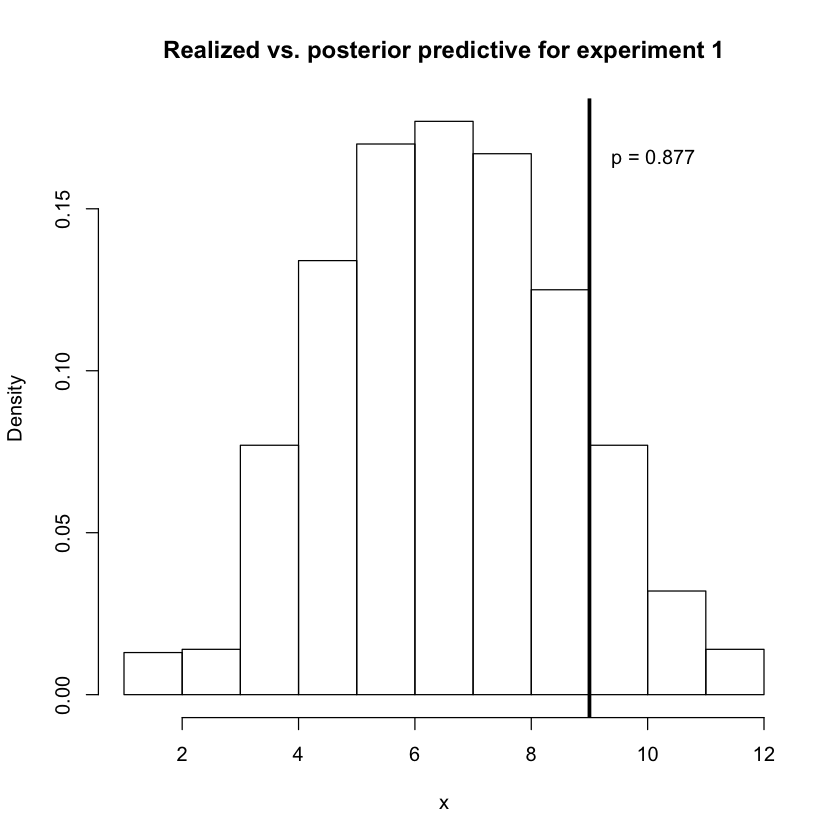

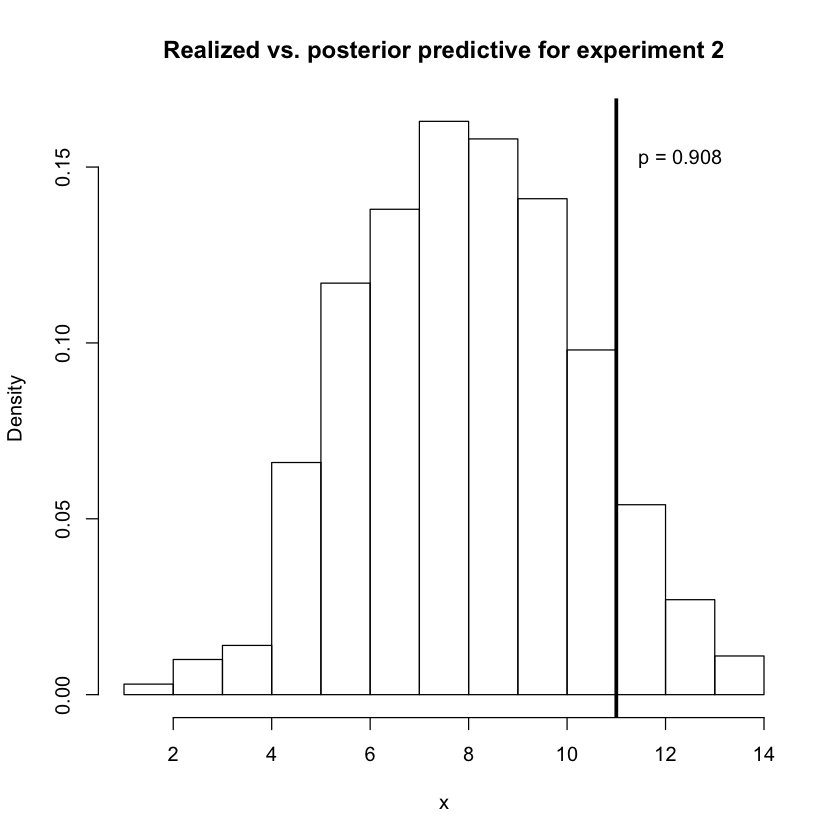

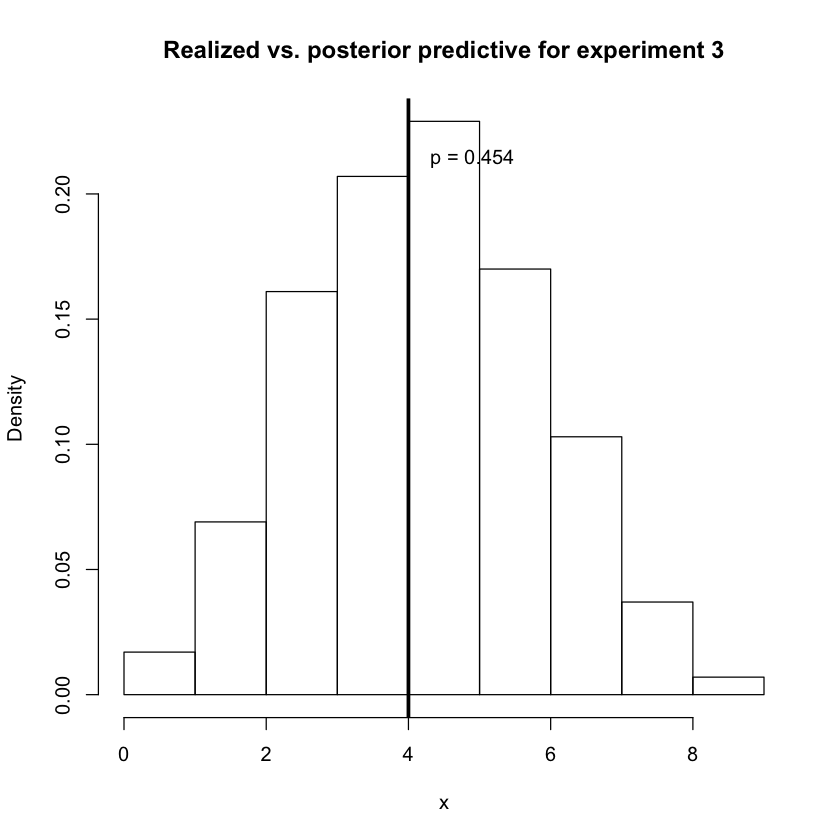

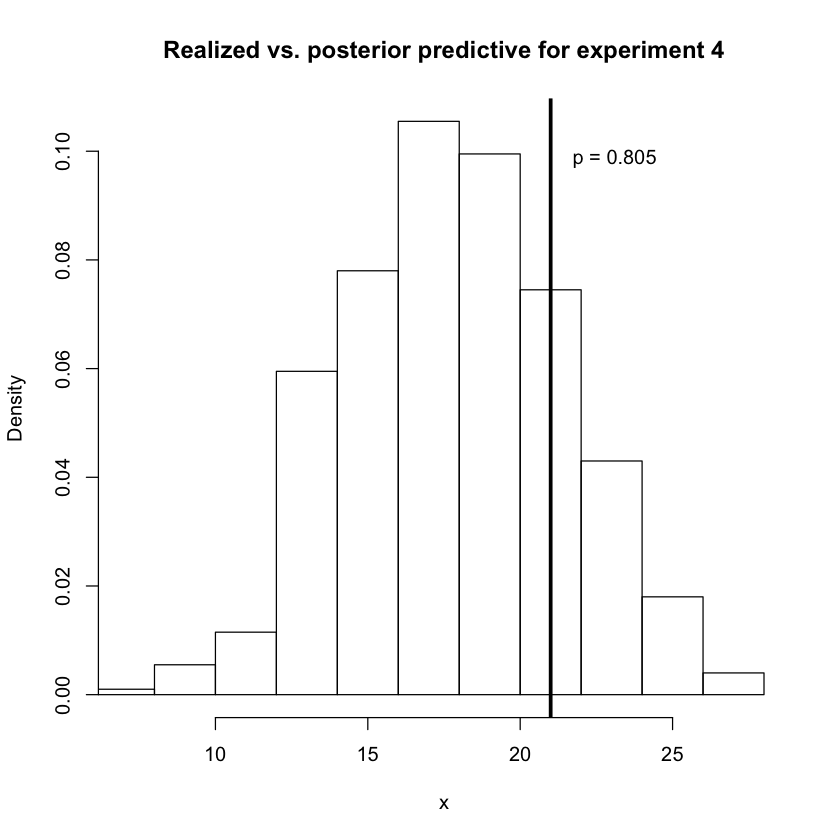

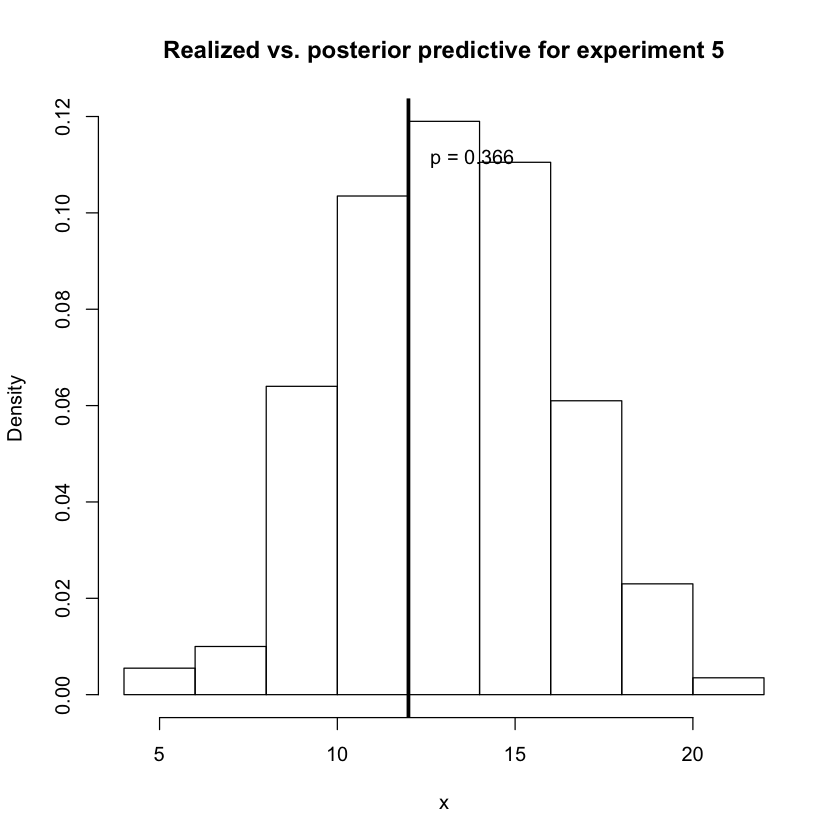

[1] 0.877 0.908 0.454 0.805 0.366 0.002

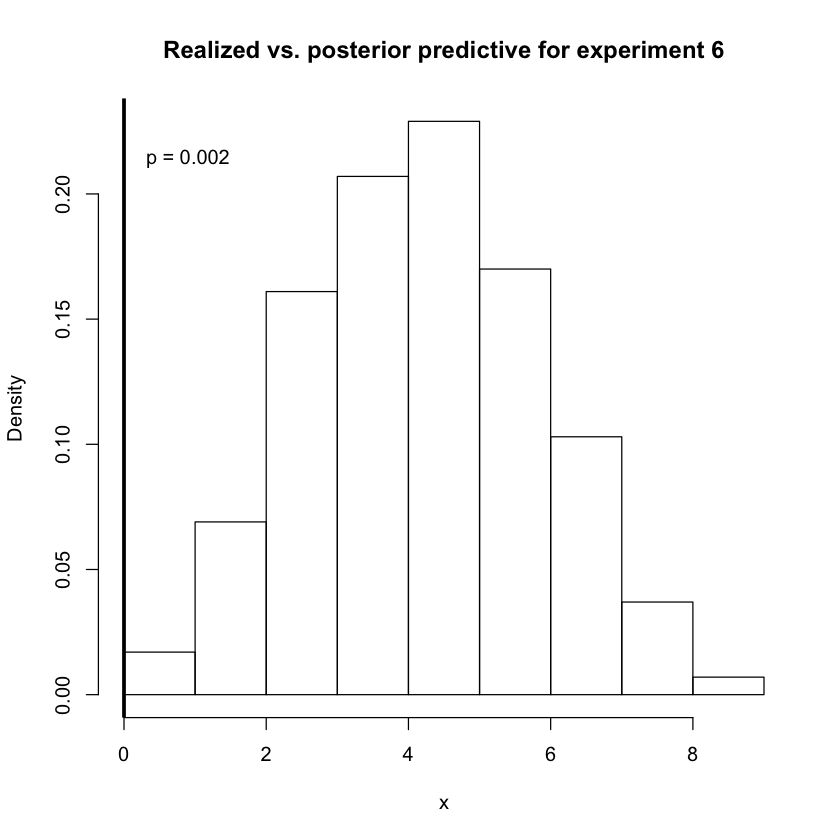

In [162]:
library(rmutil)
size_c = sum(control_data)
s_c = 123
m_c = 58 / 123
control_successes = control_data[,1]
control_num_trials = rowSums(control_data)

sample_simple_model = function(successes, num_trials, n=1000) {
    l = length(control_totals)
    samples = matrix(0, n, l)
    for (i in 1:n) {
        samples[i,] = rbetabinom(1, control_totals, m_c, s_c)
    }
    samples
}

percentile_test_statistic = function(sampler, successes, num_trials, n=1000) {
    l = length(control_totals)
    samples = sampler(successes, num_trials, n)
    
    p_values = rep(0, l)
    for (j in 1:l) {
        x = samples[,j]
        y = control_successes[j]
        p = ecdf(x)(y) 
        p_values[j] = p
        hist(x, xlim=range(c(x, y)), freq=FALSE, 
             main=sprintf("Realized vs. posterior predictive for experiment %d", j))
        abline(v=y, lwd=3)
        r = range(x)
        text_x_step = 0.1 * (r[2] - r[1])
        text_x = y + text_x_step
        text_y = par("usr")[4] * 0.9
        text(text_x, text_y, sprintf("p = %.3f", p))
    }
    p_values
}

percentile_test_statistic(sample_simple_model, control_successes, control_num_trials)

[1]  6 21  6 21


[1] 1

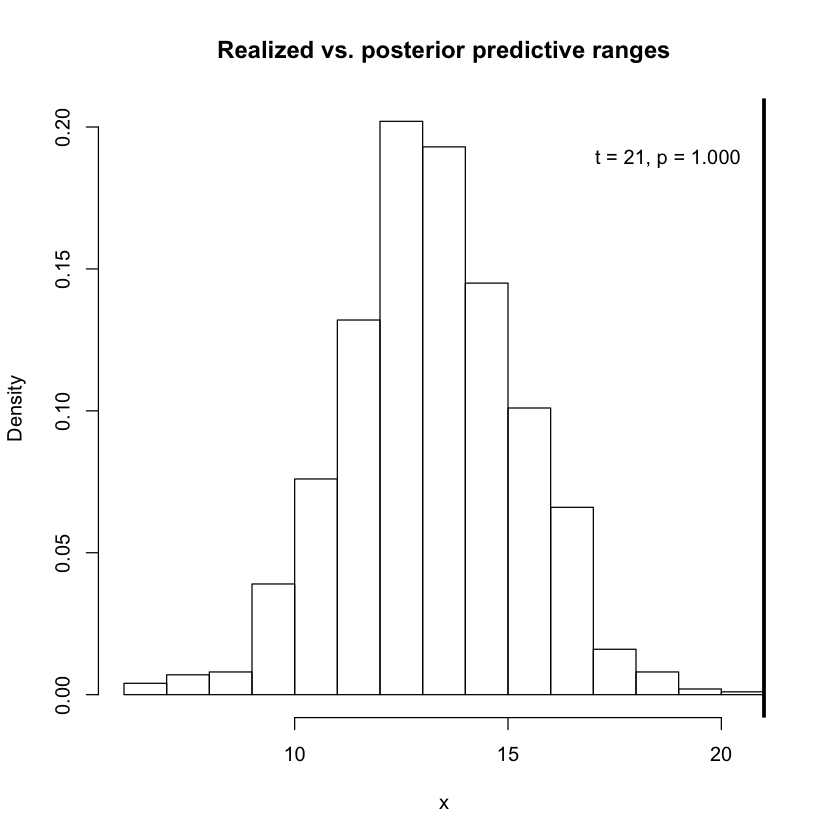

In [164]:
range_width = function(x) {
    range(x)[2] - range(x)[1]
}

range_test_statistic = function(sampler, successes, num_trials, n=1000) {
    l = length(control_totals)
    samples = sampler(successes, num_trials, n)
    
    ranges = apply(samples, 1, range_width)
    r = range_width(control_successes)
        
    x = ranges
    y = r
    print(c(range(x), range(c(x, y))))
    p = ecdf(x)(y) 
    hist(x, xlim=range(c(x, y)), freq=FALSE, main="Realized vs. posterior predictive ranges")
    abline(v=y, lwd=3)
    r = range(x)
    text_x_step = 0.15 * (r[2] - r[1])
    text_x = y - text_x_step
    text_y = par("usr")[4] * 0.9
    text(text_x, text_y, sprintf("t = %d, p = %.3f", y, p))
    
    p
}

range_test_statistic(sample_simple_model, control_successes, control_num_trials)

## Second question - heirarchical posterior

<img src="heirarchical_factor_graph.png" alt="Factor graph" style="width: 400px;"/>

I'm not sure this is the correct sampling procedude, but one way to treat the sampling procedure is as follows:
1. For each data point we which to sample (each data point representing one draw from all six trials):
    1. Sample $\alpha$ and $\beta$ once (for all six trials) from Gamma(2, 0.5)
    2. For each trial: 
        1. compute the posterior for $\theta_i$, $P(\theta_i | \alpha, \beta, s_i, n_i) = \text{Beta}(\theta_i | \alpha + s_i, \beta + n_i - s_i)$  
        2. From the posterior $\alpha$ and $\beta$, compute $s$ and $m$ as `rmutil`'s `betabinom` paramaterizes the posterior predictive distribution.
        3. Draw a sample from the posterior predictive distribution for that trial.
        
Writing an implementation of the above sampler, and adapting the code I wrote for 10.2 to accept the sampler in as an argument, we arrive at the following:

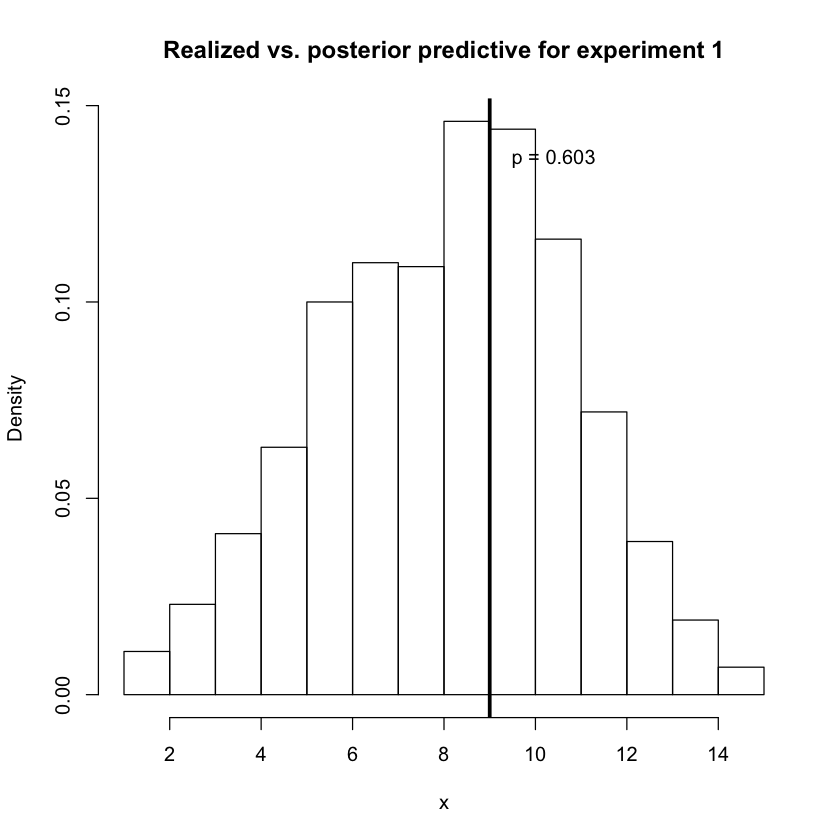

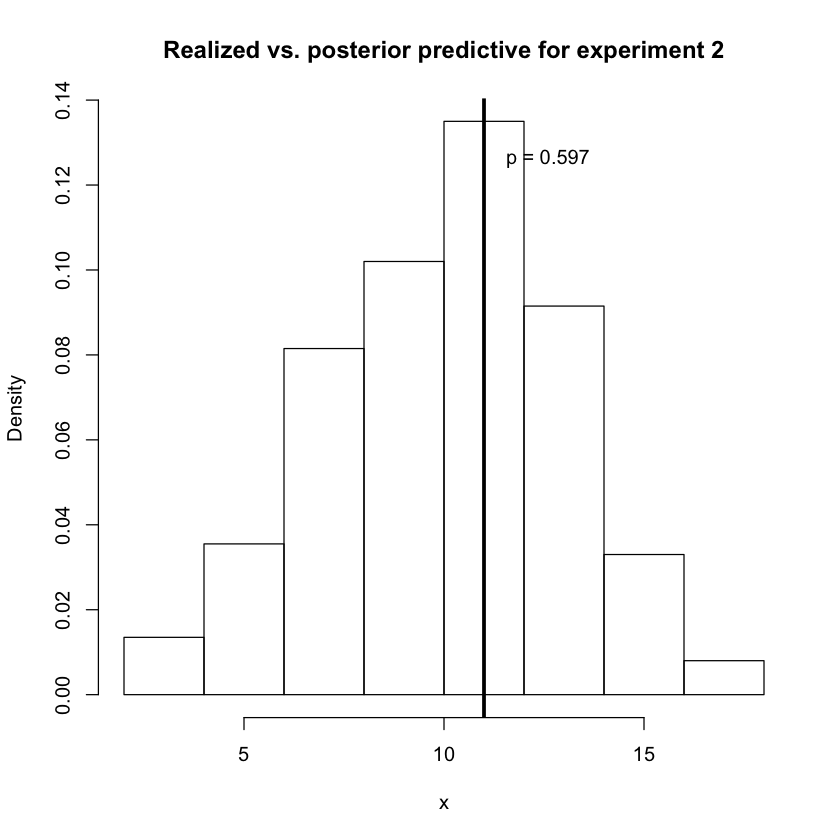

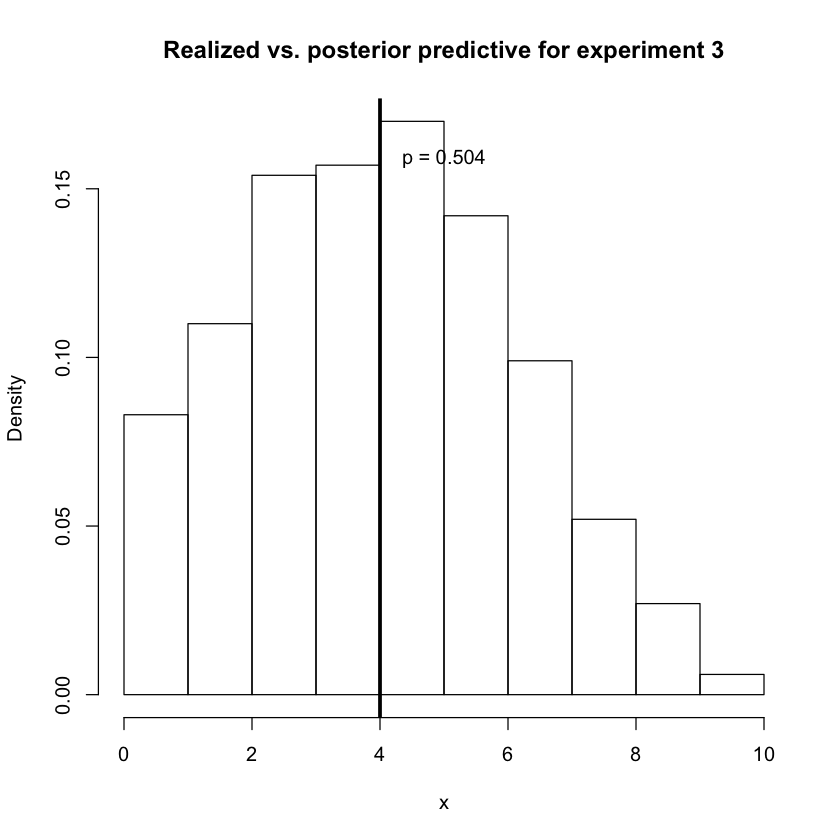

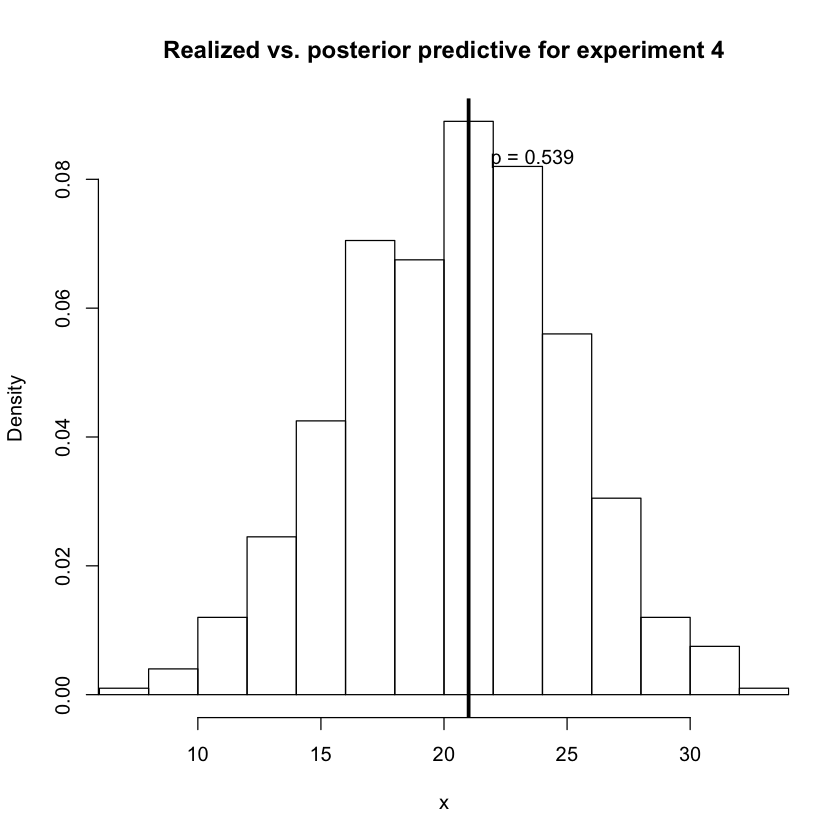

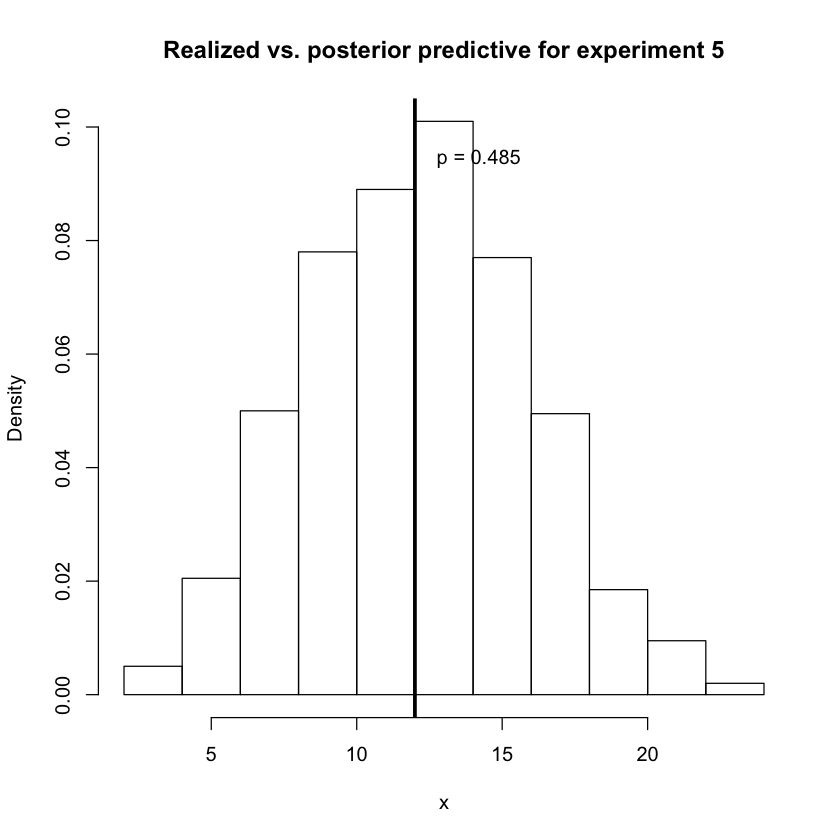

[1] 0.603 0.597 0.504 0.539 0.485 0.250

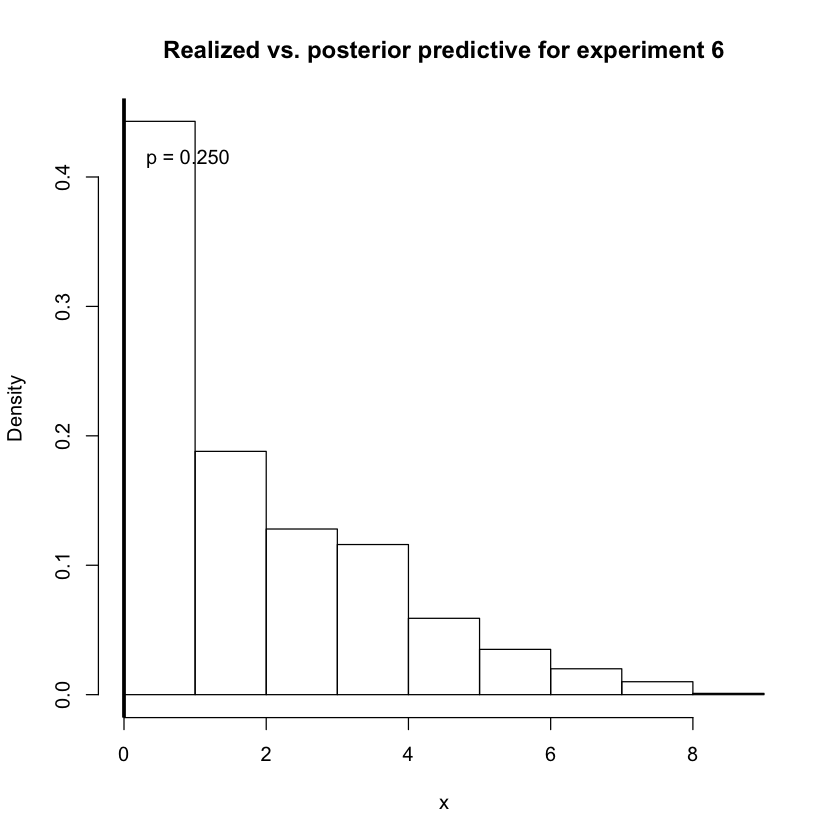

In [163]:
control_successes = control_data[,1]
control_num_trials = rowSums(control_data)

sample_heirarchical_posterior_predictive <- function(successes, num_trials, n=1000) {
    l = length(successes)
    samples = matrix(0, n, l)
    for (i in 1:n) {
        gamma_samples = rgamma(2, 2, 0.5)
        alpha = rep(gamma_samples[1], l)
        beta = rep(gamma_samples[2], l)
        
        posterior_alphas = alpha + successes
        posterior_betas = beta + num_trials - successes
        
        posterior_s = posterior_alphas + posterior_betas
        posterior_m = posterior_alphas / posterior_s
        
        samples[i,] = rbetabinom(1, num_trials, posterior_m, posterior_s)
    }
    samples
}

percentile_test_statistic(sample_heirarchical_posterior_predictive, control_successes, control_num_trials)

[1]  7 26  7 26


[1] 0.848

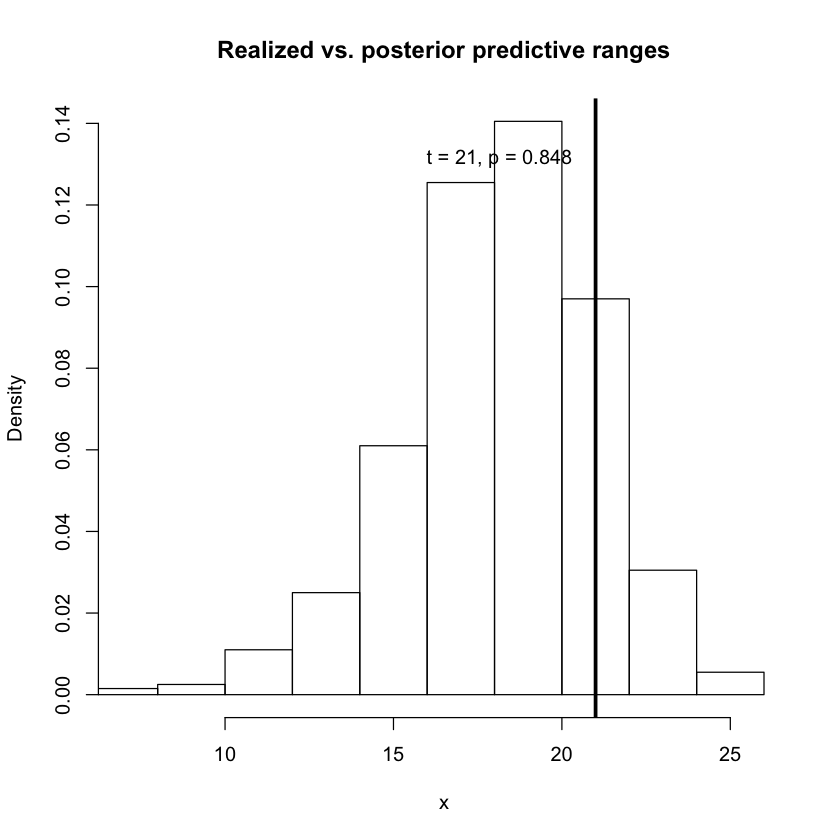

In [165]:
range_test_statistic(sample_heirarchical_posterior_predictive, control_successes, control_num_trials)

### Results: The heirarchical model appears to pass the two checks that failed the simple one. That's promising!

One interesting line of inquiry would be the following - how plausible is it to observe data that this heirarchical model fails to explain? One way to attempt to answer this question is by considerin the following: can we come up $n_i$ and $s_i$, whose sample proportion $\hat{\theta_i} = \frac{s_i}{n_i}$ falls outside the 95% confidence interval for the posterior distribution on $\theta_i$, $P(\theta_i | \alpha, \beta, s_i, n_i) = \text{Beta}(\theta_i | \alpha + s_i, \beta + n_i - s_i)$.

While we can probably tackle this question analytically, let us begin by simulation:
1. Draw $\alpha$ and $\beta$ from Gamma(2, 0.5).
2. Draw $n_i$ (say, uniformly between 10 and 100), and $s_i$ (uniformly between 0 and $n_i$)
3. Compute $\hat{\theta_i}$ and the posterior over $\theta_i$
4. Report whether or not $\hat{\theta_i}$ falls inside the 95% middle of the posterior distribution

Note that this data is NOT drawn according to the generative process this model implies. This is more designed to demonstrate what sort of data might cause this model to err, not to indicate how likely it is to actually occur.

The following R code performs this sampling investigation:

In [233]:
sample_theta_posterior <- function(n=1000, alpha=NULL, beta=NULL) {    
    if (is.null(alpha)) {
        alpha = rgamma(n, 2, 0.5)
    } else {
        alpha = rep(alpha, n)
    }
    
    if (is.null(beta)) {
        beta = rgamma(n, 2, 0.5)
    } else {
        beta = rep(beta, n)
    }
    
    n_samples = sample(10:100, n, replace = T)
    s_samples = as.integer(runif(n, rep(0, length.out = n), n_samples))
    stopifnot(all(s_samples <= n_samples))  # handy sanity check
    
    posterior_alphas = alpha + s_samples
    posterior_betas = beta + n_samples - s_samples

    lower_bounds = qbeta(0.025, posterior_alphas, posterior_betas)
    upper_bounds = qbeta(0.975, posterior_alphas, posterior_betas)
    theta_hats = s_samples / n_samples
    
    results = (theta_hats >= lower_bounds) & (theta_hats <= upper_bounds)
    p_success = sum(results) / n
    print(paste(c('Overall probability of success:', p_success)))
    print('Failure cases:')
    print(c('alpha', 'beta', 'n', 's'))
    for (i in 1:n) {
        if (!results[i]) {
            print(c(alpha[i], beta[i], n_samples[i], s_samples[i]))
        }
    }
}

sample_theta_posterior(100)


[1] "Overall probability of success:" "0.87"                           
[1] "Failure cases:"
[1] "alpha" "beta"  "n"     "s"    
[1]  2.743121  2.191124 36.000000  0.000000
[1]  2.200346  9.367288 61.000000  0.000000
[1]  4.199149 13.192670 78.000000  1.000000
[1]  0.2713276 12.8908706 93.0000000 73.0000000
[1]  0.4885134  0.3053629 48.0000000  0.0000000
[1]  6.415167  8.941732 11.000000 10.000000
[1]  1.530729  9.541182 24.000000 19.000000
[1]  5.720544  3.371931 31.000000  0.000000
[1]  6.863149  1.459927 13.000000  0.000000
[1]  9.242063  4.982614 59.000000  2.000000
[1]  5.767007  2.642355 65.000000  2.000000
[1] 10.21071  8.50278 22.00000  0.00000
[1] 15.6576 11.7778 47.0000 12.0000


Below is graphed an instructive example of where it fails - I drew $\alpha = 1.53$, $\beta = 9.54$, $n_i = 24$, $s_i = 19$, $\hat{\theta} = \frac{19}{24} = 0.79$:

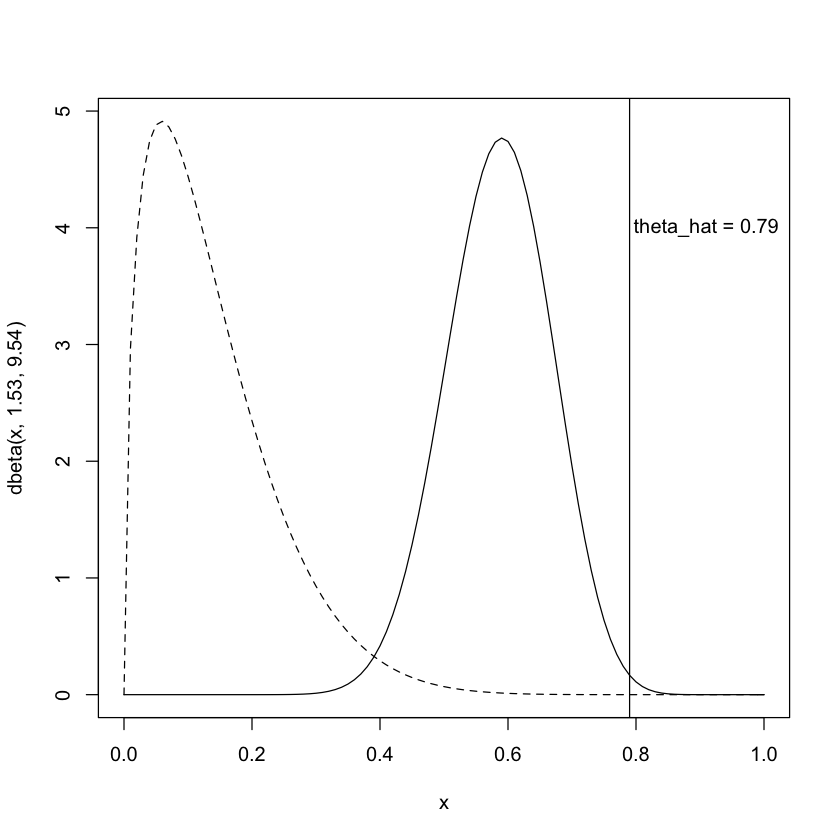

In [251]:
curve(dbeta(x, 1.53, 9.54), from=0, to=1, lty=2)
curve(dbeta(x, 1.53 + 19, 9.54 + 5), from=0, to=1, add=T)
abline(v = 0.79)
text(0.91, 4, "theta_hat = 0.79")

### Results: turns out it's quite possible to heirarchical model fail

It appears that this heirarchical model might still fail to predict sufficiently extreme results. Some extreme observed results will still fall outside the support of 95% of the probability mass of the posterior over $theta_i$.

The results appear to match my intuition that the 'fault' in this case lies with the hyperprior. The hyperprior is informative, and appears to place some mass on notion that $\alpha$ and $\beta$ are approximately the same (drawn from the same unimodal distribution), and have some positive value above 1. For example, the version provided below allows to draw from constant alpha and beta values, and vastly reduces the probability of the obsreved $\hat{\theta}$ falling outside the posterior $\theta_i$ 95% confidence interval:

In [236]:
sample_theta_posterior(100, 2, 2)

[1] "Overall probability of success:" "0.95"                           
[1] "Failure cases:"
[1] "alpha" "beta"  "n"     "s"    
[1]  2  2 28  0
[1]  2  2 54  0
[1]  2  2 23  0
[1]  2  2 22  0
[1]  2  2 61  0


### Closing Thoughts:

If I were trying to analytically solve the case of when might this happen, I'd probably start by fixing to certain prior values for $\alpha$ and $\beta$, and then derive expressions for the 2.5% and 97.5% quantiles for the posterior as functions of $n_i$ and $s_i$. This already strikes me as trick, since I don't think there's a closed form for the beta quantile function (set the CDF integral up to a point x as equal to 0.025 and solve?). I'd then play around with the relationship between these expressions and $\hat{\theta} = \frac{s_i}{n_i}$. 

Another interesting line of inquiry would be to consider updating $\alpha$ and $\beta$, by considering the messages passed back to them by all $\theta_i$, and examining the resultant Beta distribution. Let's examine that quickly:

<img src="heirarchical_factor_graph.png" alt="Factor graph" style="width: 400px;"/>

The message from $f_s$ to $\theta_i$ is trivial, since $n_i$ and $s_i$ are observed, $\mu_{n_i \rightarrow f_s} = \mu_{s_i \rightarrow f_s} = 1$, resulting in  $\mu_{f_s \rightarrow \theta_i} = \text{Binomial}(s_i | \theta_i, n_i)$, which are passed right up to $f_\theta$, $\mu_{\theta_i \rightarrow f_\theta} = \text{Binomial}(s_i | \theta_i, n_i)$

The messages from the factors on $\alpha$ and $\beta$, $\mu_{f_\alpha \rightarrow \alpha} = \text{Gamma}(\alpha | 2, 0.5)$, and $\mu_{f_\beta \rightarrow \beta} = \text{Gamma}(\beta | 2, 0.5)$, which are passed on directly from $\alpha$ and $\beta$ to $f_\theta$, $\mu_{\alpha \rightarrow f_\theta} = \text{Gamma}(\alpha | 2, 0.5)$, and $\mu_{\beta \rightarrow f_\theta} = \text{Gamma}(\beta | 2, 0.5)$

Where this begins to get hairy is the messages passed up to $\alpha$ and $\beta$, which represent the following quantitfy, for example for $\alpha$ (although this is purely symmetrical in functional form for $\beta$, they occupy different roles in the binomial PDF, resulting in different messages):

\begin{align*}
\mu_{f_\theta \rightarrow \alpha} &= \int_{\beta} \text{Gamma}(\beta | 2, 0.5) \Big( \prod_{i=1}^{n} \int_{\theta_i} Beta(\theta_i | \alpha, \beta) Binomial(s_i | \theta_i, n_i) d\theta_i \Big) d\beta
\end{align*}

Which does not appear particularly elegant to evaluate. Would we be allowed to re-write the middle expression using the beta-binomial distribution (https://en.wikipedia.org/wiki/Beta-binomial_distribution)? If that's even legal, we'd then arrive at:

\begin{align*}
\mu_{f_\theta \rightarrow \alpha} &= \int_{\beta} \text{Gamma}(\beta | 2, 0.5) \Big( \prod_{i=1}^{n} \int_{\theta_i} Beta(\theta_i | \alpha, \beta) Binomial(s_i | \theta_i, n_i) d\theta_i \Big) d\beta \\
\mu_{f_\theta \rightarrow \alpha} &= \int_{\beta} \text{Gamma}(\beta | 2, 0.5) \Big( \prod_{i=1}^{n} {n_i \choose s_i} \frac{B(\alpha + s_i, \beta + n_i - s_i)}{B(\alpha, \beta)} \Big) d\beta
\end{align*}

Which, admittedly, is not much prettier to look at or evaluate. Perhaps normal approximations serve us better?